Regarding to plots below the best parameters are 0.2 for epsilon and 3 for minimum neighbors !

Epsilon :  0.1 
Minimum neighbors : 1 
Clusters :  30


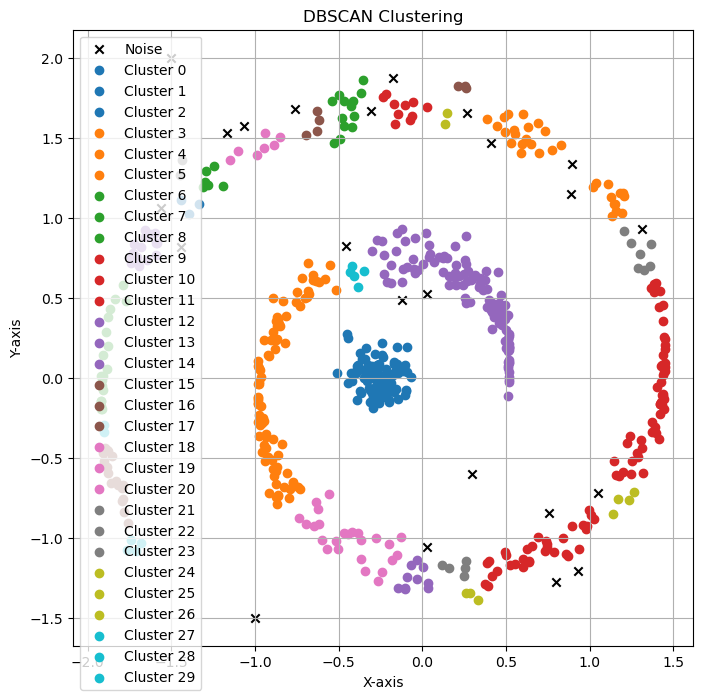

Epsilon :  0.1 
Minimum neighbors : 3 
Clusters :  24


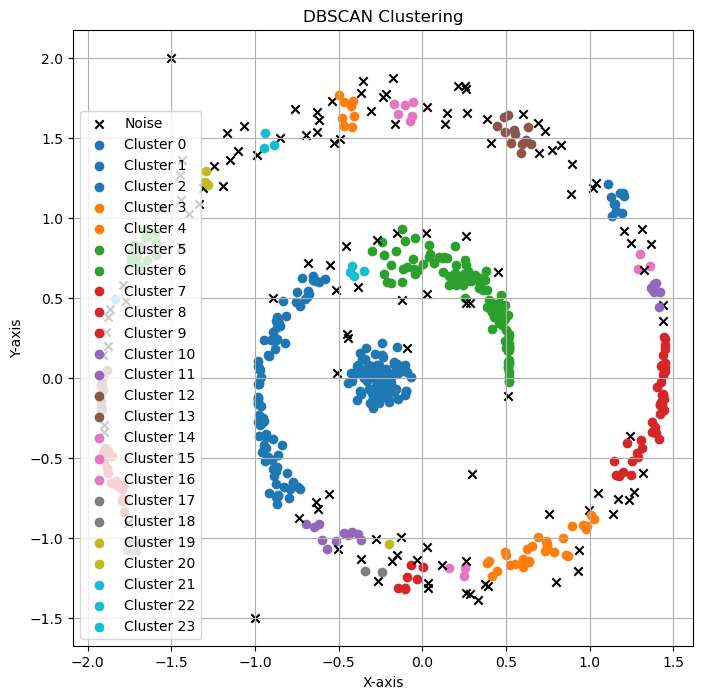

Epsilon :  0.1 
Minimum neighbors : 5 
Clusters :  24


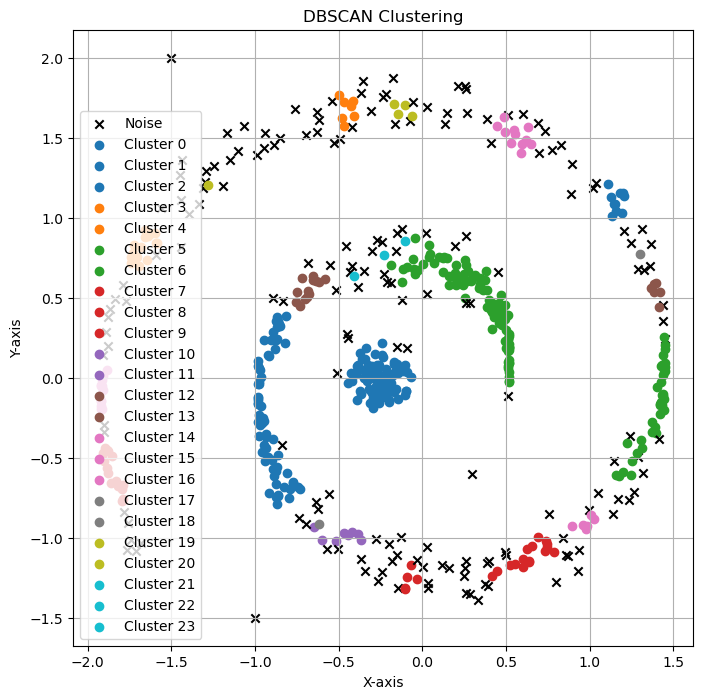

Epsilon :  0.2 
Minimum neighbors : 1 
Clusters :  2


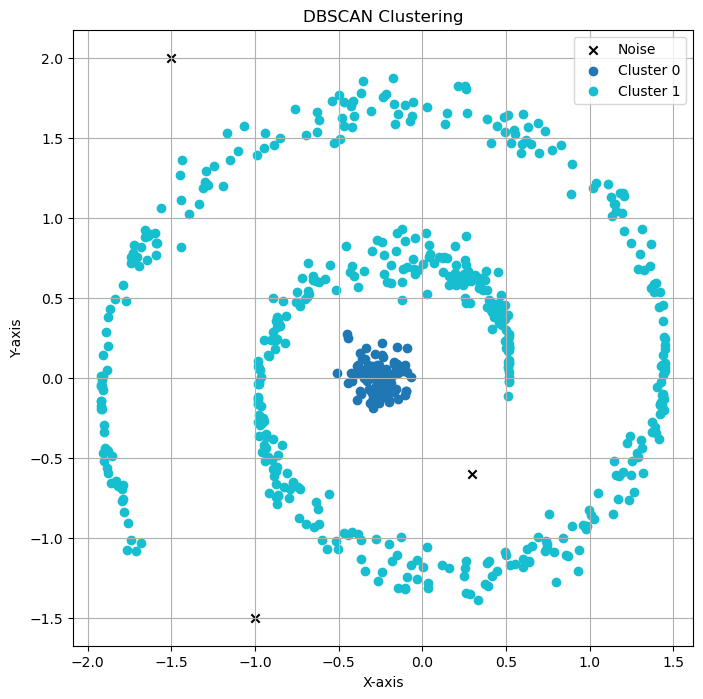

Epsilon :  0.2 
Minimum neighbors : 3 
Clusters :  2


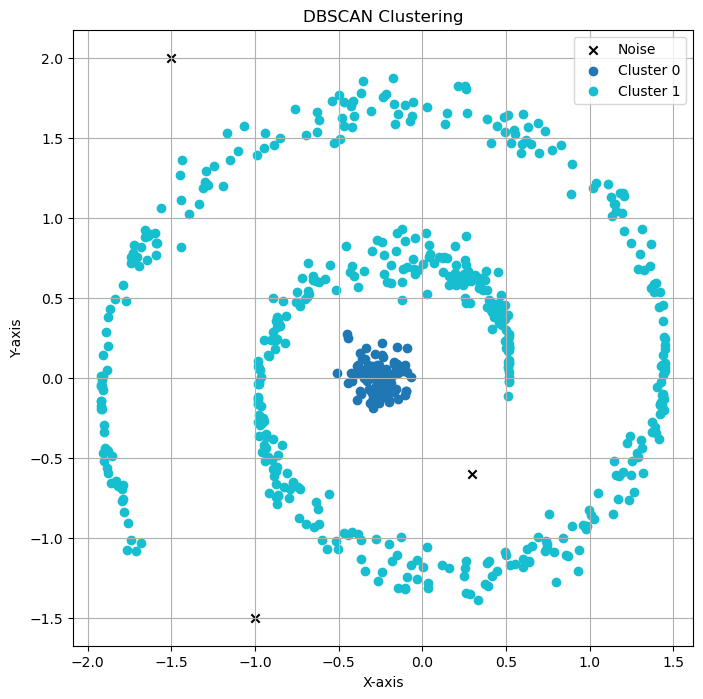

Epsilon :  0.2 
Minimum neighbors : 5 
Clusters :  2


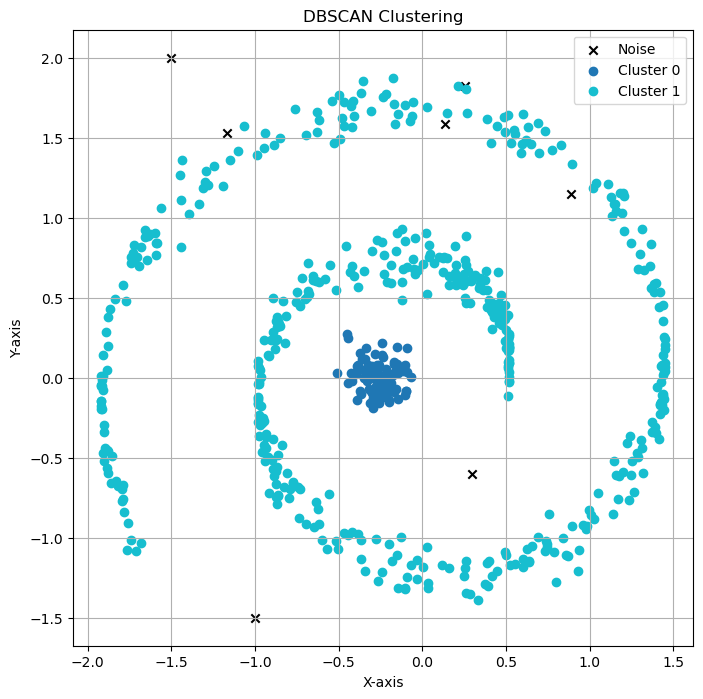

Epsilon :  0.3 
Minimum neighbors : 1 
Clusters :  1


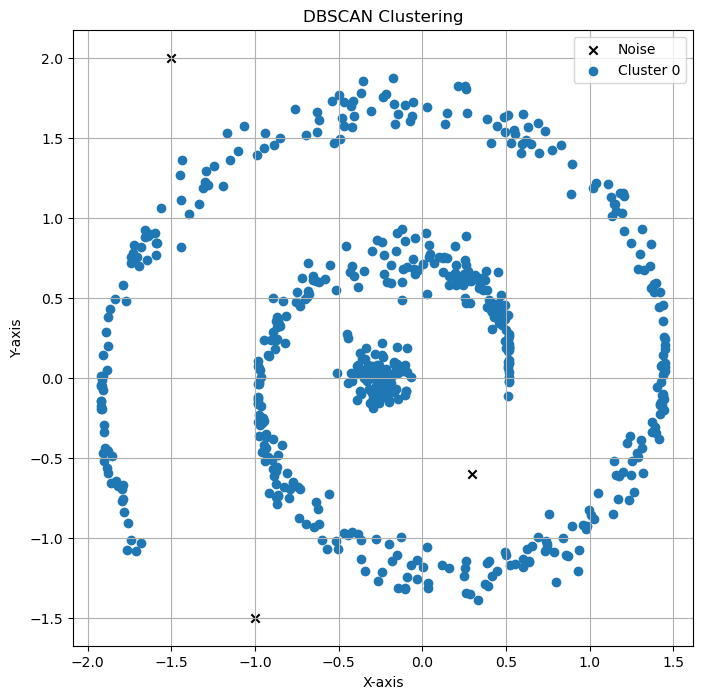

Epsilon :  0.3 
Minimum neighbors : 3 
Clusters :  1


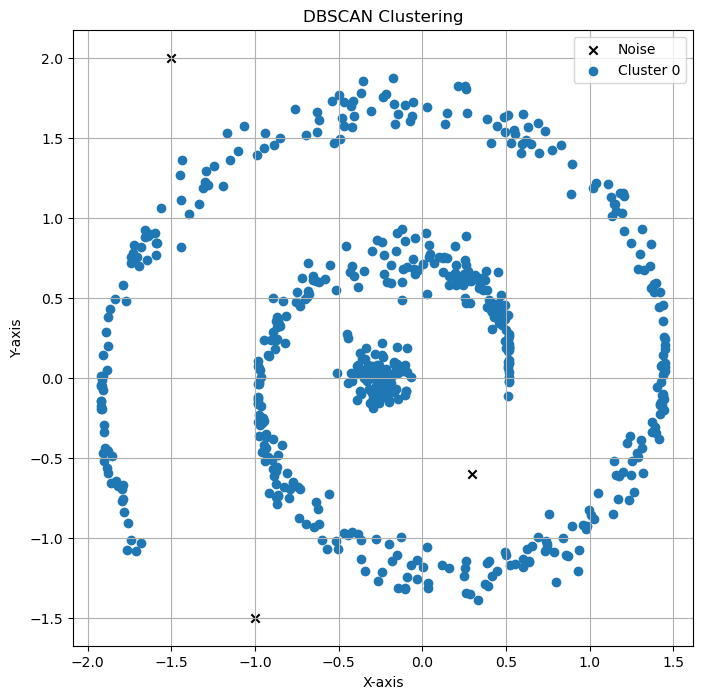

Epsilon :  0.3 
Minimum neighbors : 5 
Clusters :  1


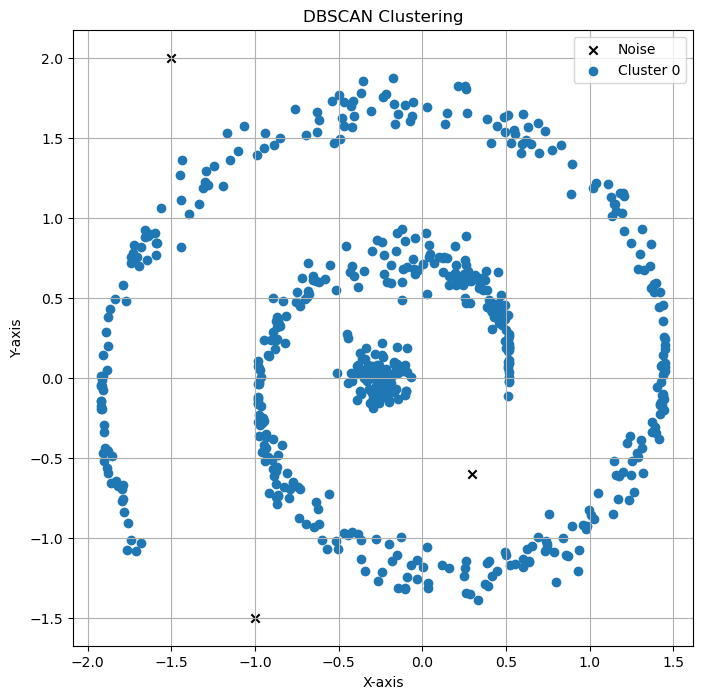

In [12]:
import numpy as np
import copy
import matplotlib.pyplot as plt
np.random.seed(42)

class DBSCAN:
    def __init__(self, data, epsilon, min_samples):
        self.data = data.tolist()
        self.epsilon = epsilon
        self.min_samples = min_samples
        self.labels = [0 for _ in range(len(self.data))]# 0 for noise, 1 for border and 2 for core
        self.clusters = [-1 for _ in range(len(self.data))]
        self.neighbor_list = []
    
    def fit(self):
        n_samples = len(self.data)
        for i in range(n_samples):
            neighbors = self.near_neighbors(i)
            self.neighbor_list.append(neighbors)
            if len(neighbors) >= self.min_samples :
                self.labels[i] = 2
        for i in range(n_samples):
            if self.labels[i] != 2 :
                for j in range(len(self.neighbor_list[i])):
                    if self.labels[j] == 2 :
                        self.labels[i] = 1
                        break

        Y = copy.deepcopy(self.data)
        n_cluster = 0
        delete_list = []
        for b in range(n_samples):
            if self.labels[b] == 0:
                delete_list.append(Y[b])
        
        Y = [lst for lst in Y if lst not in delete_list]
        while len(Y) != 0 :
            Y = self.same_cluster(Y, Y[0], n_cluster)
            n_cluster += 1

    def same_cluster(self, Y, new, n_cluster):
        Y.remove(new)
        index = -1 
        for a, sublist in enumerate(self.data):
            if sublist == new:
                index = a
                break

        if self.labels[index] == 2 : # if it is core
            self.clusters[index] = n_cluster
            neighbor_cluster = self.neighbor_list[index]
            for k in neighbor_cluster:
                if self.data[k] in Y :
                    Y = self.same_cluster(Y, self.data[k], n_cluster)
        elif self.labels[index] == 1 : # if it is border
            self.clusters[index] = n_cluster
            neighbor_cluster = self.neighbor_list[index]
            for k in neighbor_cluster:
                if self.labels[k] == 2 and (self.data[k] in Y) :
                    Y = self.same_cluster(Y, self.data[k], n_cluster)
        return Y

    def near_neighbors(self, i) :
        n_list = []
        for m in range(len(self.data)):
            if (((self.data[i][0] - self.data[m][0])**2) + ((self.data[i][1] - self.data[m][1])**2)) <= (self.epsilon**2) :
                n_list.append(m)
        n_list.remove(i)
        return n_list

n = 500
x_o = np.array([.3,-1,-1.5])
y_o = np.array([-.6,-1.5,2])
x_b = np.random.normal(-.25, .1, n//5)
y_b = np.random.normal(0, .1, n//5)
theta = np.random.uniform(0, 10, n)
r = .5 + .15 * theta
x_s = r * np.cos(theta)
y_s = r * np.sin(theta) + np.random.normal(0, .1, n)
x_1 = np.hstack([x_o, x_b, x_s])
x_2 = np.hstack([y_o, y_b, y_s])
# Dataset X
X = np.vstack([x_1,x_2]).T

print("Regarding to plots below the best parameters are 0.2 for epsilon and 3 for minimum neighbors !\n")
for eps in [0.1, 0.2, 0.3]:
    for min_s in [1, 3, 5]:
        db = DBSCAN(X, eps, min_s)
        db.fit()
        unique_clusters = set(db.clusters)-set([-1])
        colors = plt.cm.tab10(np.linspace(0, 1, len(unique_clusters)))
        plt.figure(figsize=(8, 8))
        added_labels = set()

        for idx, cluster in enumerate(db.clusters):
            if cluster == -1:  # Noise points
                plt.scatter(X[idx, 0], X[idx, 1], color='k', marker='x', label='Noise' if 'Noise' not in plt.gca().get_legend_handles_labels()[1] else "")
            else:
                if cluster not in added_labels:
                    plt.scatter(X[idx, 0], X[idx, 1], color=colors[cluster % len(colors)], label=f'Cluster {cluster}')
                    added_labels.add(cluster)
                else:
                    plt.scatter(X[idx, 0], X[idx, 1], color=colors[cluster % len(colors)])

        print("Epsilon : ", eps, "\nMinimum neighbors :", min_s, "\nClusters : ", len(unique_clusters))

        plt.title('DBSCAN Clustering')
        plt.xlabel('X-axis')
        plt.ylabel('Y-axis')
        plt.grid(True)
        plt.legend()
        plt.show()